Brandon Guijarro Josh Johnson

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config 
set_config(display= 'diagram')
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

his week, you will finalize your sales prediction project. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in predicting sales.

1) Your first task is to build a linear regression model to predict sales.

Build a linear regression model.
Evaluate the performance of your model based on r^2.
Evaluate the performance of your model based on rmse.
2) Your second task is to build a regression tree model to predict sales.

Build a simple regression tree model.
Compare the performance of your model based on r^2.
Compare the performance of your model based on rmse.  
3) You now have tried 2 different models on your data set. You need to determine which model to implement.

Overall, which model do you recommend?
Justify your recommendation.
4) To finalize this project, complete a README in your GitHub repository including:

An overview of the project
2 relevant insights from the data (supported with reporting quality visualizations)
Summary of the model and its evaluation metrics
Final recommendations.

In [ ]:
filename = '/content/drive/MyDrive/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [ ]:
X = df.drop(columns = ['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'])
y = df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
X.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [ ]:
ordinal_col = ['Outlet_Size']
nominal_col = ['Item_Fat_Content', 'Item_Type', "Outlet_Location_Type", 'Outlet_Type']
num_selector = make_column_selector(dtype_include='number')

In [ ]:
size_labels = ['Small', 'Medium', 'High']
ordered_labels = [size_labels]
ordered_labels 

[['Small', 'Medium', 'High']]

In [ ]:
mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')
missing_imputer = SimpleImputer(strategy='constant', fill_value= 'Missing')
scaler = StandardScaler()
scaler2 = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
ordinal_enc= OrdinalEncoder(categories=ordered_labels)

In [ ]:
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe 

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [ ]:
nominal_pipe = make_pipeline(missing_imputer, ohe)
nominal_pipe 

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='Missing', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [ ]:
ordinal_pipe = make_pipeline(freq_imputer, ordinal_enc, scaler2)
ordinal_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['Small', 'Medium', 'High']])),
                ('standardscaler', StandardScaler())])

In [ ]:
number_tuple = (numeric_pipe, num_selector)
nominal_tuple = (nominal_pipe, nominal_col)
ordinal_tuple = (ordinal_pipe, ordinal_col)
preprocessor = make_column_transformer(number_tuple, nominal_tuple, ordinal_tuple, remainder = 'drop')
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fc1ec596b50>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Item_Fat_Content', 'Item_Type',
                                  'Outlet_Location_Type', 'Outlet_Type']),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Small',
                                                                              'Medium',
                                                                              'High']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Outlet_Size'])])

In [ ]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fc1ec596b50>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Item_Fat_Content', 'Item_Type',
                                  'Outlet_Location_Type', 'Outlet_Type']),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Small',
                                                                              'Medium',
                                                                              'High']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Outlet_Size'])])

In [ ]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape pf data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape pf data is (6392, 32)




array([[ 0.81724868, -0.71277507,  1.82810922, ...,  1.        ,
         0.        ,  0.28737371],
       [ 0.5563395 , -1.29105225,  0.60336888, ...,  1.        ,
         0.        ,  0.28737371],
       [-0.13151196,  1.81331864,  0.24454056, ...,  0.        ,
         0.        ,  0.28737371],
       ...,
       [ 1.11373638, -0.92052713,  1.52302674, ...,  0.        ,
         0.        ,  0.28737371],
       [ 1.76600931, -0.2277552 , -0.38377708, ...,  0.        ,
         0.        ,  0.28737371],
       [ 0.81724868, -0.95867683, -0.73836105, ...,  0.        ,
         0.        , -1.38404828]])

In [ ]:
X_train_processed

array([[ 0.81724868, -0.71277507,  1.82810922, ...,  1.        ,
         0.        ,  0.28737371],
       [ 0.5563395 , -1.29105225,  0.60336888, ...,  1.        ,
         0.        ,  0.28737371],
       [-0.13151196,  1.81331864,  0.24454056, ...,  0.        ,
         0.        ,  0.28737371],
       ...,
       [ 1.11373638, -0.92052713,  1.52302674, ...,  0.        ,
         0.        ,  0.28737371],
       [ 1.76600931, -0.2277552 , -0.38377708, ...,  0.        ,
         0.        ,  0.28737371],
       [ 0.81724868, -0.95867683, -0.73836105, ...,  0.        ,
         0.        , -1.38404828]])

In [ ]:
X_test_processed

array([[ 0.33100885, -0.77664625, -0.99881554, ...,  0.        ,
         0.        ,  1.9587957 ],
       [-1.17989246,  0.1003166 , -1.58519423, ...,  0.        ,
         0.        , -1.38404828],
       [ 0.37844688, -0.48299432, -1.59578435, ...,  0.        ,
         0.        ,  0.28737371],
       ...,
       [-1.13957013,  1.21832428,  1.09397975, ...,  0.        ,
         0.        ,  0.28737371],
       [-1.49772727, -0.77809567, -0.36679966, ...,  0.        ,
         0.        ,  0.28737371],
       [ 0.52076098, -0.77976293,  0.11221189, ...,  0.        ,
         0.        ,  0.28737371]])

In [ ]:
X_train_df = pd.DataFrame(X_train_processed)
X_train_df.head() 

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.817249,-0.712775,1.828109,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.287374
1,0.556340,-1.291052,0.603369,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.287374
2,-0.131512,1.813319,0.244541,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.287374
3,-1.169219,-1.004931,-0.952591,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.384048
4,1.528819,-0.965484,-0.336460,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.287374


In [ ]:
X_test_df = pd.DataFrame(X_test_processed)
X_test_df.head() 

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,3.310089e-01,-0.776646,-0.998816,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.958796
1,-1.179892e+00,0.100317,-1.585194,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.384048
2,3.784469e-01,-0.482994,-1.595784,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.287374
3,4.213344e-16,-0.415440,0.506592,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.287374
4,-6.426567e-01,-1.047426,0.886725,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.384048


In [ ]:
lin_reg = LinearRegression()

In [ ]:
linreg_pipe = make_pipeline(preprocessor, lin_reg)
linreg_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc1ec596b50>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='const...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Item_Fat_Content',
                                                   'Item_Type',
                                                   'Outlet_Location_Type',
                                                   'Outlet_Type']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'High']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Outlet_Size'])])),
                ('linearregression', LinearRegression())])

In [ ]:
linreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc1ec596b50>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='const...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Item_Fat_Content',
                                                   'Item_Type',
                                                   'Outlet_Location_Type',
                                                   'Outlet_Type']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'High']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Outlet_Size'])])),
                ('linearregression', LinearRegression())])

In [ ]:
linreg_train_preds = linreg_pipe.predict(X_train)
linreg_test_preds = linreg_pipe.predict(X_test)

In [ ]:
linreg_train_score = linreg_pipe.score(X_train, y_train)
linreg_test_score = linreg_pipe.score(X_test, y_test)
print("R^2 scores for Linear Regression Model:")
print("Training:", linreg_train_score)
print('Testing', linreg_test_score)

R^2 scores for Linear Regression Model:
Training: 0.5606867811932243
Testing 0.5657166564293133


R2 Values above

In [ ]:
linreg_rmse_train = np.sqrt(mean_squared_error(y_train, linreg_train_preds))
linreg_rmse_train

1140.2315604611356

In [ ]:
linreg_rmse_test = np.sqrt(mean_squared_error(y_test, linreg_test_preds))
linreg_rmse_test

1094.6131195012504

RMSE Values above

In [ ]:
y_train.describe()

count     6392.000000
mean      2209.979357
std       1720.441446
min         33.290000
25%        856.884600
50%       1808.978600
75%       3136.250900
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
dec_tree = DecisionTreeRegressor(random_state=42)

In [ ]:
dec_tree_pipe = make_pipeline(preprocessor, dec_tree)

In [ ]:
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc1ec596b50>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='const...
                                                  ['Item_Fat_Content',
                                                   'Item_Type',
                                                   'Outlet_Location_Type',
                                                   'Outlet_Type']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'High']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Outlet_Size'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [ ]:
dectree_train_preds = dec_tree_pipe.predict(X_train)
dectree_test_preds = dec_tree_pipe.predict(X_test)

In [ ]:
dectree_train_score = dec_tree_pipe.score(X_train, y_train)
dectree_test_score = dec_tree_pipe.score(X_test, y_test)
print("R^2 scores for Linear Regression Model:")
print ("Training:", dectree_train_score)
print("Testing:", dectree_test_score)

R^2 scores for Linear Regression Model:
Training: 1.0
Testing: 0.14959345249220102


R2 Values above

In [ ]:
dectree_rmse_train = np.sqrt(mean_absolute_error(y_train, dectree_train_preds))
dectree_rmse_train

1.0330285759302648e-08

In [ ]:
dectree_rmse_test = np.sqrt(mean_absolute_error(y_test, dectree_test_preds))
dectree_rmse_test

32.62576414239482

In [ ]:
dec_tree.get_depth()

41

In [ ]:
dec_tree.get_n_leaves()

6263

In [ ]:
max_depth_range = list(range(2, 40))
r2 = [] 
for depth in max_depth_range:
  dec_tree_test = DecisionTreeRegressor(max_depth= depth,
                                        random_state = 42)
  dec_tree_pipe_test = make_pipeline(preprocessor, dec_tree_test)
  dec_tree_pipe_test.fit(X_train, y_train)
  score = dec_tree_pipe_test.score(X_test, y_test)
  r2.append(score)

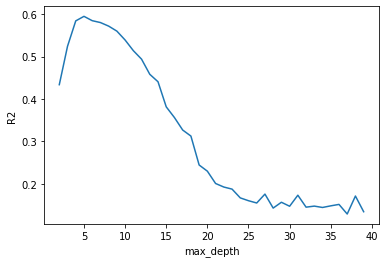

In [ ]:
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

In [ ]:
dec_tree_5 = DecisionTreeRegressor(max_depth = 5, random_state = 42)
dec_tree_pipe_5 = make_pipeline(preprocessor, dec_tree_5)
dec_tree_pipe_5.fit(X_train, y_train)
train_5_score = dec_tree_pipe_5.score(X_train, y_train)
test_5_score = dec_tree_pipe_5.score(X_test, y_test)
print(train_5_score)
print(test_5_score)

0.603931621085344
0.5947201327889511


In [ ]:
dectree_train_preds_5 = dec_tree_pipe_5.predict(X_train)
dectree_test_preds_5 = dec_tree_pipe_5.predict(X_test)

In [ ]:
dectree_rmse_train_5 = np.sqrt(mean_squared_error(y_train, dectree_train_preds_5))
dectree_rmse_train_5

1082.6572972836627

in my opinion Regression tree model is better because  of the better accuaracy it gives us.